In [1]:
import matplotlib.pyplot as plt
import copy

from obspy.clients.fdsn.client import Client
from obspy import UTCDateTime
from obspy.core.event import Catalog
from obspy.core.stream import Stream
from obspy import read_events
from obspy import read_inventory
import cartopy.crs as ccrs


# CATALOGUE

In [2]:
client=Client('INGV')

stime=UTCDateTime('2014-01-01T00:00:00')
etime=UTCDateTime('2024-01-01T00:00:00')

In [3]:
#get_events saccorotti
cat=client.get_events(starttime=stime,endtime=etime,
                      minlatitude=40.75,maxlatitude=40.90,minlongitude=14.00,
                      maxlongitude=14.20)

cat

758 Event(s) in Catalog:
2023-12-21T21:13:38.660000Z | +40.801,  +14.113 | 1.0  Md | manual
2023-12-15T00:26:46.519000Z | +40.828,  +14.141 | 1.2  Md | manual
...
2015-10-07T07:20:34.000000Z | +40.836,  +14.149 | 1.5  Md | manual
2014-09-20T22:09:41.000000Z | +40.800,  +14.130 | 0.6  Md | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'

In [ ]:
#get events giaco
lat=40.8478 #pozzuoli
long=14.0918
rad_events=0.15
cat=client.get_events(starttime=stime,endtime=etime,includearrivals=False,          
                      latitude=lat,longitude=long,maxradius=rad_events) 

print(cat)

### create new catalogue with only manual events (optional)

In [ ]:
#select only manual events (!!!for INGV client!!!)
cat_manual=Catalog()

for ev in cat:
    for origin in ev['origins']:
        if origin.evaluation_mode == 'manual':
            eid=ev.resource_id.id.split('=')[1]                                         #id number
            cat_manual += client.get_events(includearrivals=True,eventid=eid)
            break
cat_manual

### plot events location and mag with cartopy

In [ ]:
cat_manual.plot(projection='local',resolution='i');

### eliminate automatic picking from catalogue

In [ ]:
for ev in cat_manual:

    ind_picks=[]
    for ind,pick in enumerate(ev.picks):
        if pick.evaluation_mode == 'automatic':
            ind_picks.append(ind)
    
    for ind in reversed(ind_picks):
        del ev.picks[ind]

cat_manual

some events have no picks (bad)

save catalogue

In [ ]:
cat_manual.write('/Users/giaco/UNI/GIT/seis/FLEGREI/flegrei_2014_2023_INGV/catalogue_flegrei_INGV.xml',format='QUAKEML')

## load catalogue from local

In [ ]:
catf=read_events('/Users/giaco/UNI/GIT/seis/FLEGREI/flegrei_2014_2023_INGV/catalogue_flegrei_INGV.xml')

### filter events with magnitude > X

In [4]:
cat_mag = catf.filter("magnitude >= 2.5")
cat_mag

43 Event(s) in Catalog:
2023-11-23T18:41:46.950000Z | +40.831,  +14.136 | 3.1  Md | manual
2023-10-16T10:36:21.190000Z | +40.827,  +14.142 | 3.6  Md | manual
...
2020-12-19T21:54:53.200000Z | +40.831,  +14.142 | 2.7  Md | manual
2015-10-07T09:10:50.000000Z | +40.828,  +14.148 | 2.5  Md | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'

confrontare due cataloghi su tempi di arrivo e poi confrontare lat lon e mag

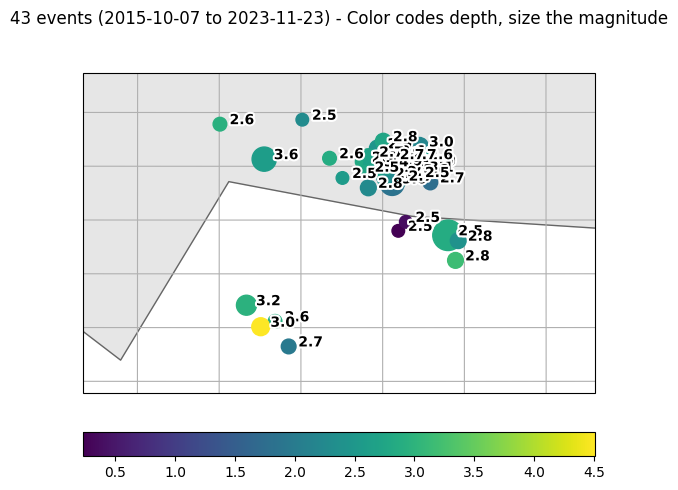

In [5]:
cat_mag.plot(projection='local',resolution='i');

In [ ]:
cat_mag.write('/Users/giaco/UNI/GIT/seis/FLEGREI/flegrei_2014_2023_INGV/catalogue_flegrei_INGV_mag2_5.xml',format='QUAKEML')